Now do on the blind data 
1. DXI GENerate 
2. SXI ALAN test 
3. then Call the pickle file then do blind test on that

Blind test code is in ACC.py 
I have send to Prabhat. 
Connect all of you then do

In [1]:
import joblib
# loaded_model = joblib.load(r"sxiplusbestmodelmasterLNMFraud.pkl")
loaded_model = joblib.load(r"sxiplusbestmodelinsurance_7_3_p.pkl")

# loaded_model = joblib.load(r"mobile_trans_fraud.pkl")

feature_names = loaded_model.get_booster().feature_names
feature_names


c:\Users\chskc\anaconda3\envs\Sriya\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:19:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\data\../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


['lat',
 'long',
 'city_pop',
 'merch_lat',
 'merch_long',
 'merchant_fraud_Boyer PLC',
 'merchant_fraud_Cormier LLC',
 'merchant_fraud_Kilback LLC',
 'merchant_fraud_Kuhn LLC',
 'merchant_fraud_Schumm PLC',
 'category_gas_transport',
 'category_grocery_pos',
 'category_home',
 'category_kids_pets',
 'category_shopping_pos',
 'gender_M',
 'city_Meridian',
 'city_Others',
 'city_Phoenix',
 'city_San Antonio',
 'city_Utica',
 'state_NY',
 'state_OH',
 'state_Others',
 'state_PA',
 'state_TX',
 'job_Film/video editor',
 'job_Materials engineer',
 'job_Naval architect',
 'job_Others',
 'job_Surveyor, land/geomatics',
 'age_range_30-40',
 'age_range_40-50',
 'age_range_50-60',
 'age_range_60+',
 'composite_dxi']

In [2]:
testdata = pd.read_csv("fulldataplustrainmasterfraud_7_3.csv",low_memory=False)


<IPython.core.display.Javascript object>

In [3]:
testdata

,primary_key,amt,lat,long,city_pop,merch_lat,merch_long,merchant_fraud_Boyer PLC,merchant_fraud_Cormier LLC,merchant_fraud_Kilback LLC,...,job_Naval architect,job_Others,"job_Surveyor, land/geomatics",age_range_30-40,age_range_40-50,age_range_50-60,age_range_60+,is_fraud,composite_dxi_label,composite_dxi
0,prim__6560123091,8.16,33.2887,-111.0985,2872,34.209232,-110.192174,0,0,0,...,0,1,0,1,0,0,0,1,0,2.785379
1,prim__3361816169,313.13,40.1008,-80.0652,632,40.540941,-79.371579,0,0,0,...,0,1,0,1,0,0,0,1,0,2.821368
2,prim__8501699533,13.11,39.1412,-94.3515,123373,38.303165,-94.062587,0,0,0,...,0,1,0,1,0,0,0,1,0,2.693936
3,prim__9164040841,827.23,44.6400,-73.3113,1654,44.992196,-72.769496,0,0,0,...,0,1,0,1,0,0,0,1,0,2.787412
4,prim__6310276380,690.55,44.0978,-72.0191,1966,44.432326,-72.748026,0,0,0,...,0,1,0,0,0,0,1,1,0,2.751270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106872,prim__8784939893,14.80,42.3770,-83.0796,673342,42.992270,-82.960045,0,0,0,...,0,1,0,0,0,1,0,0,0,3.716072
106873,prim__2462238279,1.35,34.9906,-81.8327,167,35.085309,-81.985617,0,0,0,...,0,1,0,1,0,0,0,0,0,3.112392
106874,prim__7528298229,1.86,39.7417,-93.6289,271,38.999019,-92.797911,0,0,0,...,0,1,0,0,0,1,0,0,0,3.358614
106875,prim__6287624507,53.67,36.8347,-84.4436,1565,36.916427,-85.226262,0,0,0,...,0,1,0,0,0,1,0,0,0,3.646517


In [4]:
import pandas as pd
testdata = pd.read_csv("fulldataplustrainmasterfraud_7_3.csv",low_memory=False)
ytest = testdata['is_fraud']

testdata = testdata.drop(['index','is_fraud','primary_key','composite_dxi_label'],axis=1,errors='ignore')
testdata


,amt,lat,long,city_pop,merch_lat,merch_long,merchant_fraud_Boyer PLC,merchant_fraud_Cormier LLC,merchant_fraud_Kilback LLC,merchant_fraud_Kuhn LLC,...,job_Film/video editor,job_Materials engineer,job_Naval architect,job_Others,"job_Surveyor, land/geomatics",age_range_30-40,age_range_40-50,age_range_50-60,age_range_60+,composite_dxi
0,8.16,33.2887,-111.0985,2872,34.209232,-110.192174,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2.785379
1,313.13,40.1008,-80.0652,632,40.540941,-79.371579,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2.821368
2,13.11,39.1412,-94.3515,123373,38.303165,-94.062587,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2.693936
3,827.23,44.6400,-73.3113,1654,44.992196,-72.769496,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2.787412
4,690.55,44.0978,-72.0191,1966,44.432326,-72.748026,0,0,0,0,...,0,0,0,1,0,0,0,0,1,2.751270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106872,14.80,42.3770,-83.0796,673342,42.992270,-82.960045,0,0,0,0,...,0,0,0,1,0,0,0,1,0,3.716072
106873,1.35,34.9906,-81.8327,167,35.085309,-81.985617,0,0,0,0,...,0,0,0,1,0,1,0,0,0,3.112392
106874,1.86,39.7417,-93.6289,271,38.999019,-92.797911,0,0,0,0,...,0,0,0,1,0,0,0,1,0,3.358614
106875,53.67,36.8347,-84.4436,1565,36.916427,-85.226262,0,0,0,0,...,0,0,0,1,0,0,0,1,0,3.646517


In [5]:
testdata.shape

(106877, 37)

In [6]:
# testdata['isFraud']

In [7]:
# df7_scaled = testdata.copy()

# for _, row in final_df.iterrows():
#     feature = row['Feature']
#     ratio = row['Ratio']
#     if feature in df7_scaled.columns:
#         df7_scaled[feature] = df7_scaled[feature] * ratio

# # Done!
# print("Updated df7 with scaled features based on ratio.")


In [8]:
# print(loaded_dict.keys())


In [9]:
feature_names = loaded_model.get_booster().feature_names
testdata = testdata[feature_names]
pred = loaded_model.predict(testdata)

#### 8020 Fraud non Fraud

In [10]:
####1st
from sklearn.metrics import recall_score,precision_score,accuracy_score,auc,roc_curve,confusion_matrix
acc = accuracy_score(ytest,pred)
preci = precision_score(ytest,pred)
recal = recall_score(ytest,pred)

y_probs = loaded_model.predict_proba(testdata)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.657224185136286)

In [11]:
print('acc,preci,recal:',acc,preci,recal)


acc,preci,recal: 0.6561842117574408 0.458839248434238 0.8634692145708269


In [12]:
cm=confusion_matrix(ytest,pred)###
cm

array([[42658, 32402],
       [ 4344, 27473]])

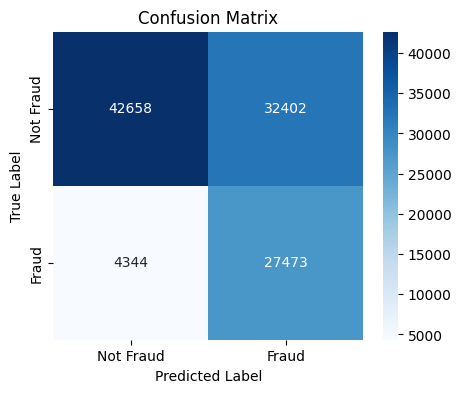

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud','Fraud'], yticklabels=['Not Fraud','Fraud'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### CreditCard + Bank + Mobile

In [ ]:
####1st
from sklearn.metrics import recall_score,precision_score,accuracy_score,auc,roc_curve,confusion_matrix
acc = accuracy_score(ytest,pred)
preci = precision_score(ytest,pred)
recal = recall_score(ytest,pred)

y_probs = loaded_model.predict_proba(testdata)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

In [ ]:
print('acc,preci,recal:',acc,preci,recal)


In [ ]:
cm=confusion_matrix(ytest,pred)###
cm

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### CreditCard

#### 10X

In [ ]:
# 1st
from sklearn.metrics import recall_score,precision_score,accuracy_score,auc,roc_curve,confusion_matrix
acc = accuracy_score(ytest,pred)
preci = precision_score(ytest,pred)
recal = recall_score(ytest,pred)
y_probs = loaded_model.predict_proba(testdata)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

In [ ]:
print('acc,preci,recal:',acc,preci,recal)

names = ['Accuracy', 'Precision', 'Recall']
values = [acc, preci, recal]

for name, value in zip(names, values):
    print(f"{name}: {value} (rounded: {round(value, 2)})")



In [ ]:
cm=confusion_matrix(ytest,pred)###
cm

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix X33")
plt.show()

#### 5X

In [ ]:
# 1st
from sklearn.metrics import recall_score,precision_score,accuracy_score,auc,roc_curve,confusion_matrix
acc = accuracy_score(ytest,pred)
preci = precision_score(ytest,pred)
recal = recall_score(ytest,pred)
y_probs = loaded_model.predict_proba(testdata)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

In [ ]:
print('acc,preci,recal:',acc,preci,recal)

names = ['Accuracy', 'Precision', 'Recall']
values = [acc, preci, recal]

for name, value in zip(names, values):
    print(f"{name}: {value} (rounded: {round(value, 4)*100})")



In [ ]:
preci*100

In [ ]:
cm=confusion_matrix(ytest,pred)###
cm

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix 7th")
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Values from the computation
TN = 96093
FP = 0
FN = 965
TP = 3627

cm = np.array([[TN, FP],
               [FN, TP]])

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#### Cred + Bank

In [ ]:
#### 2nd
from sklearn.metrics import recall_score,precision_score,accuracy_score,auc,roc_curve,confusion_matrix
acc = accuracy_score(ytest,pred)
preci = precision_score(ytest,pred)
recal = recall_score(ytest,pred)

y_probs = loaded_model.predict_proba(testdata)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc

In [ ]:
print('acc,preci,recal:',acc,preci,recal)


In [ ]:
cm=confusion_matrix(ytest,pred)###
cm

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# MI

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# ex_cols = ['TransactionID', 'TransactionAmt', 'ProductCD', 'DeviceType', 'DeviceInfo']

X = data.drop(columns=['is_fraud'], errors='ignore')
y = data['is_fraud']

X = X.copy()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

mi_scores = mutual_info_classif(X, y, discrete_features='auto')

mi_results = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)

print(mi_results)


# Matching and Adding Columns

In [ ]:
import joblib

# Load the trained model
loaded_model = joblib.load("sxiplusbestmodelmasterLNMFraud.pkl")
feature_names = loaded_model.get_booster().feature_names
# Add 'TransactionID' as the primary key and remove the last feature (if not needed)
feature_names = ['TransactionID'] + feature_names[:-1]
print("Feature Names from Model:", feature_names)


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"D:\DeskTop\Fraud Datasets\Fraud_Filling_4TH\merge_cred_bank_mob_ieee.csv")
print("Column Names from Dataset:", df.columns.tolist())


In [ ]:
len(df.columns.tolist())

In [ ]:
import numpy as np

missing_features = [col for col in feature_names if col not in df.columns]

for col in missing_features:
    df[col] = np.nan

print("Updated DataFrame Columns:", df.columns.tolist())


In [ ]:
percent_zeros = (df.isnull().sum() / len(df)) * 100
col_0 = percent_zeros[percent_zeros > 40].index
print(percent_zeros)

In [ ]:
# df.drop('Unnamed: 0',axis=1,inplace=True)
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,errors='ignore')

In [ ]:
df.head()

In [ ]:
df.to_csv('ieee_mob_bank_cred50kblankothers.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd

df2 = pd.read_csv("trainLNMfraudvae.csv",low_memory=False)
df1= pd.read_csv("ieee_mob_bank_cred50kblankothers.csv",low_memory=False)

In [ ]:
import pandas as pd
import numpy as np

for col in df1.columns:
    if col in df2.columns:
        nan_mask = df1[col].isna()
        num_nans = nan_mask.sum()
        random_values = np.random.choice(df2[col].dropna().values, size=num_nans, replace=True)
        df1.loc[nan_mask, col] = random_values


In [ ]:
df1.to_csv('ieee_mob_bank_cred50kimputed.csv')

In [ ]:
df1.isnull().sum()

# Indexing

In [ ]:
df = pd.read_csv('trainLNMfraudvae.csv',low_memory=False)

In [ ]:
col_names = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'EXT_SOURCE_1', 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_CONTRACT_TYPE_Revolving loans', 'LIVE_REGION_NOT_WORK_REGION', 'ELEVATORS_MODE', 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_8', 'OCCUPATION_TYPE_Drivers', 'NAME_INCOME_TYPE_Working', 'ENTRANCES_MEDI',
 'REGION_RATING_CLIENT_W_CITY', 'OCCUPATION_TYPE_Laborers', 'OBS_60_CNT_SOCIAL_CIRCLE', 'REG_CITY_NOT_LIVE_CITY',
 'NAME_HOUSING_TYPE_With parents', 'FLOORSMIN_MEDI', 'WALLSMATERIAL_MODE_Stone, brick', 'FLAG_WORK_PHONE',
 'NAME_FAMILY_STATUS_Married', 'DEF_30_CNT_SOCIAL_CIRCLE', 'REG_REGION_NOT_LIVE_REGION',
 'REG_CITY_NOT_WORK_CITY', 'NONLIVINGAREA_AVG', 'FLAG_EMP_PHONE', 'ORGANIZATION_TYPE_Self-employed',
 'NONLIVINGAREA_MEDI', 'WEEKDAY_APPR_PROCESS_START_TUESDAY', 'OWN_CAR_AGE', 'NAME_INCOME_TYPE_State servant',
 'NAME_EDUCATION_TYPE_Lower secondary', 'YEARS_BUILD_AVG', 'DAYS_EMPLOYED', 'FLAG_PHONE', 'FONDKAPREMONT_MODE_reg oper account',
 'LIVINGAREA_MODE', 'HOUSETYPE_MODE_block of flats', 'DAYS_BIRTH', 'LANDAREA_MODE', 'OCCUPATION_TYPE_Sales staff', 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY', 'WALLSMATERIAL_MODE_Panel', 'AMT_ANNUITY', 'BASEMENTAREA_MEDI', 'NONLIVINGAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'AMT_GOODS_PRICE', 'NAME_FAMILY_STATUS_Separated', 'NAME_HOUSING_TYPE_Municipal apartment',
 'LIVE_CITY_NOT_WORK_CITY', 'HOUR_APPR_PROCESS_START', 'FLOORSMIN_AVG', 'LANDAREA_MEDI', 'TransactionID', 'NAME_FAMILY_STATUS_Widow',
 'NAME_TYPE_SUITE_Unaccompanied', 'FLAG_OWN_CAR_Y', 'FONDKAPREMONT_MODE_org spec account', 'LIVINGAPARTMENTS_MODE', 'OCCUPATION_TYPE_Managers',
 'CNT_FAM_MEMBERS', 'YEARS_BEGINEXPLUATATION_MODE', 'AMT_INCOME_TOTAL', 'YEARS_BUILD_MODE', 'BASEMENTAREA_MODE',
 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_TYPE_SUITE_Spouse, partner', 'TOTALAREA_MODE', 'FLOORSMAX_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
 'REG_REGION_NOT_WORK_REGION', 'LIVINGAPARTMENTS_MEDI', 'WEEKDAY_APPR_PROCESS_START_THURSDAY', 'COMMONAREA_MODE', 'FLAG_DOCUMENT_16',
 'FLOORSMIN_MODE', 'NAME_HOUSING_TYPE_Office apartment', 'NONLIVINGAPARTMENTS_AVG', 'APARTMENTS_AVG',
 'LIVINGAPARTMENTS_AVG','newbalanceDest', 'newbalanceOrig', 'oldbalanceOrg','V244', 'V201', 'V199', 'V258', 'id_17', 'V156', 'card3',
 'V45', 'ProductCD_C', 'V62', 'card6_credit', 'V23', 'V192', 'V87', 'ProductCD_S', 'V248', 'ProductCD_H', 'V243', 'DeviceType_desktop',
 'V67', 'V123', 'V44', 'id_31_safari generic', 'V186', 'V112', 'V190', 'V196', 'ProductCD_R', 'V47', 'V195', 'V261', 'V189', 'V222', 'V83',
 'V66', 'ProductCD_W', 'V26', 'DeviceInfo_Others', 'id_12_Found', 'V170', 'V155',
 'id_31_ie 11.0 for desktop', 'M9_F', 'card1','housing_status_BA', 'payment_type_AA', 'device_os_windows', 'phone_home_valid',
 'keep_alive_session', 'housing_status_BE', 'has_other_cards', 'proposed_credit_limit', 'payment_type_AC', 'prev_address_months_count',
 'foreign_request', 'email_is_free', 'employment_status_CA', 'AMT_INCOME_TOTAL', 'device_os_macintosh', 'phone_mobile_valid', 'age',
 'device_os_other', 'current_address_months_count', 'name_email_similarity', 'date_of_birth_distinct_emails_4w', 'device_distinct_emails_8w',
 'month', 'velocity_24h', 'housing_status_BC', 'device_os_linux', 'zip_count_4w', 'bank_branch_count_8w',
 'payment_type_AB','category_grocery_pos', 'category_gas_transport', 'amt', 'job_Others', 'category_kids_pets', 'gender_M',
 'category_home', 'category_shopping_pos', 'last_Others']

# Get the indices of matching columns as a list
matched_indices = [df.columns.get_loc(col) for col in col_names if col in df.columns]

print("Matched indices:", matched_indices)

[]

# KUCH BHI

In [ ]:
import pandas as pd

df_mob = pd.DataFrame({
    'Feature': ['newbalanceDest', 'newbalanceOrig', 'oldbalanceOrg'],
    'Importance': [0.356552, 0.201833, 0.164252]
})
df_mob.to_csv('mobfeats.csv',index=False)


In [ ]:
import pandas as pd

df_simcred = pd.DataFrame({
    'Feature': [
        'category_grocery_pos', 'category_gas_transport', 'amt',
        'job_Others', 'category_kids_pets', 'gender_M',
        'category_home', 'category_shopping_pos', 'last_Others'
    ],
    'Importance': [
        0.340421, 0.156594, 0.104676,
        0.079208, 0.026583, 0.024670,
        0.020869, 0.019935, 0.019752
    ]
})
df_simcred.to_csv('simredfeats.csv',index=False)


In [ ]:
df_ieee = pd.read_csv('IEEE80feat.csv')
df_bank = pd.read_csv('bank80feat.csv')


In [ ]:
# df_ieee

In [ ]:
df_cred = pd.read_csv('cred_top80.csv')
# df_cred

In [ ]:
df_train = pd.read_csv('train_top80.csv')
# df_train

In [ ]:
# Assuming your datasets are named df1, df2, df3, df4, df5, df6
# And the feature column is named 'Feature' in all of them

features_6 = set(df_train['Feature'])

match_ratios = []
for i, df in enumerate([df_mob, df_ieee, df_bank, df_simcred, df_cred], start=1):
    features = set(df['Feature'])
    matched = features.intersection(features_6)
    ratio = len(matched) / len(features_6)
    match_ratios.append((f"Dataset {i}", len(matched), len(features_6), round(ratio, 2)))

# Display results
for name, matched_count, total_6, ratio in match_ratios:
    print(f"{name}: {matched_count}/{total_6} features matched — Match Ratio: {ratio}")


In [ ]:
# Set dataset 6 with Feature as index
df6_feat = df_train.set_index('Feature')

# Datasets to compare
datasets = [df_mob, df_ieee, df_bank, df_simcred, df_cred]
dataset_names = ['mob', 'ieee', 'bank', 'simcred', 'cred']

# List to collect all matched features and ratios
rows = []

# Loop through datasets
for df, name in zip(datasets, dataset_names):
    df_feat = df.set_index('Feature')

    # Matched features
    matched_features = df_feat.index.intersection(df6_feat.index)

    # Compute ratio
    ratio_series = df_feat.loc[matched_features, 'Importance'] / df6_feat.loc[matched_features, 'Importance']

    # Append results as rows
    for feature, ratio in ratio_series.items():
        rows.append({'Feature': feature, 'Ratio': ratio})

# Create final DataFrame
final_df = pd.DataFrame(rows)

# Optional: round ratio
final_df['Ratio'] = final_df['Ratio'].round(3)

# Display
print(final_df)


In [ ]:
# combined_df.round(3)

In [ ]:
final_df.to_csv('matched_cols.csv',index=False)

In [ ]:
len(final_df)

# Matching Creds with OThers

In [ ]:
df1= pd.read_csv(r"fulldatapluscred50k_othersX10Times.csv",low_memory=False)
# df2= pd.read_csv(r"fulldataplusieee_mob_bank_cred50kimputed.csv",low_memory=False)
df1.shape

In [ ]:
df1.head()


In [ ]:
df1['isFraud'].value_counts()

In [ ]:
# cat_cols = df1.select_dtypes(include=['bool']).columns
# cat_cols.tolist()

# label_encoders = {}
# for column in cat_cols.tolist():
#     le = LabelEncoder()
#     df1[column] = le.fit_transform(df1[column])
#     label_encoders[column] = le

In [ ]:
df1.shape

In [ ]:
len(list(df1.columns))

In [ ]:
exclude_columns = ['isFraud', 'composite_dxi','composite_dxi_label']

common_cols = df1.columns.intersection(df2.columns)
uncommon_cols_in_df2 = df2.columns.difference(common_cols)

common_cols_to_modify = common_cols.difference(exclude_columns)
uncommon_cols_to_modify = uncommon_cols_in_df2.difference(exclude_columns)



In [ ]:
common_cols_to_modify

In [ ]:
uncommon_cols_to_modify

In [ ]:
df1[uncommon_cols_to_modify] = 0


In [ ]:
df1.shape

In [ ]:
# df[uncommon_cols_to_modify] = df2[uncommon_cols_to_modify]*10
# # df2['composite_dxi'] = df2['composite_dxi'] * 0.75
df1.drop(['composite_dxi_label','composite_dxi'],axis=1,errors='ignore',inplace=True)
print("Final updated df1:")
df1.head()


In [ ]:
len(common_cols)

In [ ]:
# df1.head()

In [ ]:
# # Create a new alphanumeric primary key
# df1['TransactionID'] = ['PK' + str(i).zfill(6) for i in range(1, len(df1) + 1)]

# # Reorder columns to place the new primary key first
# cols = ['TransactionID'] + [col for col in df1.columns if col != 'TransactionID']
# df1 = df1[cols]


In [ ]:
# import pandas as pd

# # Assuming df is your DataFrame
# df1 = df1.sample(n=50000, random_state=42)
# remaining_df = df1.drop(df1.index)

In [ ]:
# # Save both to CSV (or any other format you prefer)
# df1.to_csv('ONLINECREDFFRAUD7th50K.csv', index=False)
# remaining_df.to_csv('ONLINECREDFFRAUD7th.csv', index=False)

In [ ]:
# df1.to_csv('ONLINECREDFFRAUD7.csv',index=False)

# Rebalance training of CC with 50-50 and 80-20 fraud – non fraud

In [ ]:
import pandas as pd
from sklearn.utils import resample

# Sample dataset
df = pd.read_csv('ieee_mob_bank_cred50kimputed.csv',low_memory=False)  # Use your actual dataset
# df = pd.read_csv(r"D:\DeskTop\SRIYA WORK\SXI Code\Fraud Datasets\sryfiles\sryfiles\newww\credcardfrd50knew.csv",low_memory=False)  # Use your actual dataset
df=df.iloc[:,1:]
fraud = df[df['isFraud'] == 1]
non_fraud = df[df['isFraud'] == 0]


In [ ]:
df

In [ ]:
df['isFraud'].value_counts()


In [ ]:
# Rebalance to 50% fraud and 50% non-fraud
non_fraud_downsampled = resample(non_fraud,
                                 replace=False,
                                 n_samples=len(fraud),
                                 random_state=42)

df_balanced_50_50 = pd.concat([fraud, non_fraud_downsampled])
df_balanced_50_50 = df_balanced_50_50.sample(frac=1, random_state=42)  # Shuffle


In [ ]:
# target_ratio = 0.8

# n_non_fraud = int(len(fraud) * (1 - target_ratio) / target_ratio)

# non_fraud_downsampled = resample(non_fraud,
#                                  replace=False,
#                                  n_samples=n_non_fraud,
#                                  random_state=42)

# df_balanced_80_20_fraud = pd.concat([fraud, non_fraud_downsampled])
# df_balanced_80_20_fraud = df_balanced_80_20_fraud.sample(frac=1, random_state=42)  # Shuffle

# print(df_balanced_80_20_fraud['isFraud'].value_counts())

In [ ]:
df_balanced_50_50['isFraud'].value_counts()#/len(df_balanced_50_50)

In [ ]:
# List of candidate binary columns (e.g., those that are mostly 0/1)
df=df_balanced_50_50
binary_like_cols = []

for col in df.columns:
    unique_vals = df[col].dropna().unique()
    if df[col].dtype != 'object' and set(unique_vals).issubset({0, 1}) == False:
        # Check if most values are near 0/1
        if df[col].between(0, 1).mean() > 0.9:  # 90% of values between 0 and 1
            binary_like_cols.append(col)

df[binary_like_cols] = df[binary_like_cols].applymap(lambda x: 1 if x >= 0.5 else 0)

print(f"Converted these columns to strict 0/1: {binary_like_cols}")


In [ ]:
df_balanced_80_20_fraud.to_csv('ieee_mob_bank_cred50k5050fraud.csv',index=False)
